In [1]:
!pip install qiskit ipywidgets

     |████████████████████████████████| 6.0MB 15.0MB/s 
     |████████████████████████████████| 18.0MB 225kB/s 
     |████████████████████████████████| 235kB 50.7MB/s 
     |████████████████████████████████| 215kB 44.8MB/s 
     |████████████████████████████████| 2.1MB 30.9MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.5MB 38.4MB/s 
     |████████████████████████████████| 194kB 50.3MB/s 
     |████████████████████████████████| 112kB 44.9MB/s 
     |████████████████████████████████| 614kB 32.4MB/s 
     |████████████████████████████████| 3.2MB 37.3MB/s 
     |████████████████████████████████| 6.3MB 33.6MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=6f8b44ca522f6b1b24d9f352282b0110bdb0759ab73f36afd50ced3fa6e7cf39
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [2]:
# A = {{-9, -2, -2, 9}, {-3, 10, -3, -3}, {-8, 6, -9, -8}, {-8, 8, 10, 9}}
# x1 = 2 q0 + q1 - 2 q2 - q3
# b = {{-29}, {19}, {30}, {-19}}
# 12 qubits with integer solutions
# x = {{0}, {1}, {0}, {-3}}
# maximum 5896
# panelty

import numpy as np
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit import *
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter

In [3]:
linear = {'q0': 534.0, 'q1': 267.0, 'q10': -256.0, 'q11': -128.0, 'q12': 1578.0, 'q13': 789.0, 'q14': -654.0, 'q15': -327.0, 'q2': 390.0, 'q3': 195.0, 'q4': -436.0, 'q5': -218.0, 'q6': 1276.0, 'q7': 638.0, 'q8': 820.0, 'q9': 410.0}
quadratic =  {('q0', 'q1'): 154.0, ('q0', 'q10'): -198.0, ('q1', 'q10'): -99.0, ('q0', 'q11'): -99.0, ('q1', 'q11'): -49.5, ('q10', 'q11'): 94.0, ('q0', 'q12'): -16.0, ('q1', 'q12'): -8.0, ('q10', 'q12'): -126.0, ('q11', 'q12'): -63.0, ('q0', 'q13'): -8.0, ('q1', 'q13'): -4.0, ('q10', 'q13'): -63.0, ('q11', 'q13'): -31.5, ('q12', 'q13'): 154.0, ('q0', 'q14'): 16.0, ('q1', 'q14'): 8.0, ('q10', 'q14'): 126.0, ('q11', 'q14'): 63.0, ('q0', 'q15'): 8.0, ('q1', 'q15'): 4.0, ('q10', 'q15'): 63.0, ('q11', 'q15'): 31.5, ('q14', 'q15'): 154.0, ('q10', 'q2'): 198.0, ('q11', 'q2'): 99.0, ('q12', 'q2'): 16.0, ('q13', 'q2'): 8.0, ('q14', 'q2'): -16.0, ('q15', 'q2'): -8.0, ('q10', 'q3'): 99.0, ('q11', 'q3'): 49.5, ('q12', 'q3'): 8.0, ('q13', 'q3'): 4.0, ('q14', 'q3'): -8.0, ('q15', 'q3'): -4.0, ('q2', 'q3'): 154.0, ('q0', 'q4'): -120.0, ('q1', 'q4'): -60.0, ('q10', 'q4'): 160.0, ('q11', 'q4'): 80.0, ('q12', 'q4'): -192.0, ('q13', 'q4'): -96.0, ('q14', 'q4'): 192.0, ('q15', 'q4'): 96.0, ('q2', 'q4'): 120.0, ('q3', 'q4'): 60.0, ('q0', 'q5'): -60.0, ('q1', 'q5'): -30.0, ('q10', 'q5'): 80.0, ('q11', 'q5'): 40.0, ('q12', 'q5'): -96.0, ('q13', 'q5'): -48.0, ('q14', 'q5'): 96.0, ('q15', 'q5'): 48.0, ('q2', 'q5'): 60.0, ('q3', 'q5'): 30.0, ('q4', 'q5'): 140.0, ('q0', 'q6'): 120.0, ('q1', 'q6'): 60.0, ('q10', 'q6'): -160.0, ('q11', 'q6'): -80.0, ('q12', 'q6'): 192.0, ('q13', 'q6'): 96.0, ('q14', 'q6'): -192.0, ('q15', 'q6'): -96.0, ('q2', 'q6'): -120.0, ('q3', 'q6'): -60.0, ('q0', 'q7'): 60.0, ('q1', 'q7'): 30.0, ('q10', 'q7'): -80.0, ('q11', 'q7'): -40.0, ('q12', 'q7'): 96.0, ('q13', 'q7'): 48.0, ('q14', 'q7'): -96.0, ('q15', 'q7'): -48.0, ('q2', 'q7'): -60.0, ('q3', 'q7'): -30.0, ('q6', 'q7'): 140.0, ('q0', 'q8'): 198.0, ('q1', 'q8'): 99.0, ('q12', 'q8'): 126.0, ('q13', 'q8'): 63.0, ('q14', 'q8'): -126.0, ('q15', 'q8'): -63.0, ('q2', 'q8'): -198.0, ('q3', 'q8'): -99.0, ('q4', 'q8'): -160.0, ('q5', 'q8'): -80.0, ('q6', 'q8'): 160.0, ('q7', 'q8'): 80.0, ('q0', 'q9'): 99.0, ('q1', 'q9'): 49.5, ('q12', 'q9'): 63.0, ('q13', 'q9'): 31.5, ('q14', 'q9'): -63.0, ('q15', 'q9'): -31.5, ('q2', 'q9'): -99.0, ('q3', 'q9'): -49.5, ('q4', 'q9'): -80.0, ('q5', 'q9'): -40.0, ('q6', 'q9'): 80.0, ('q7', 'q9'): 40.0, ('q8', 'q9'): 94.0}
V = [v*(-1) for v in linear.values()]
E = []
for i, key in enumerate(quadratic):
    E.append((int(key[0][1:]), int(key[1][1:]), (-1)*list(quadratic.values())[i]))
print(V)
print(E)

[-534.0, -267.0, 256.0, 128.0, -1578.0, -789.0, 654.0, 327.0, -390.0, -195.0, 436.0, 218.0, -1276.0, -638.0, -820.0, -410.0]
[(0, 1, -154.0), (0, 10, 198.0), (1, 10, 99.0), (0, 11, 99.0), (1, 11, 49.5), (10, 11, -94.0), (0, 12, 16.0), (1, 12, 8.0), (10, 12, 126.0), (11, 12, 63.0), (0, 13, 8.0), (1, 13, 4.0), (10, 13, 63.0), (11, 13, 31.5), (12, 13, -154.0), (0, 14, -16.0), (1, 14, -8.0), (10, 14, -126.0), (11, 14, -63.0), (0, 15, -8.0), (1, 15, -4.0), (10, 15, -63.0), (11, 15, -31.5), (14, 15, -154.0), (10, 2, -198.0), (11, 2, -99.0), (12, 2, -16.0), (13, 2, -8.0), (14, 2, 16.0), (15, 2, 8.0), (10, 3, -99.0), (11, 3, -49.5), (12, 3, -8.0), (13, 3, -4.0), (14, 3, 8.0), (15, 3, 4.0), (2, 3, -154.0), (0, 4, 120.0), (1, 4, 60.0), (10, 4, -160.0), (11, 4, -80.0), (12, 4, 192.0), (13, 4, 96.0), (14, 4, -192.0), (15, 4, -96.0), (2, 4, -120.0), (3, 4, -60.0), (0, 5, 60.0), (1, 5, 30.0), (10, 5, -80.0), (11, 5, -40.0), (12, 5, 96.0), (13, 5, 48.0), (14, 5, -96.0), (15, 5, -48.0), (2, 5, -60.0),

In [4]:
V = [-534.0, -267.0, -390.0, -195.0, 436.0, 218.0, -1276.0, -638.0, -820.0, -410.0, 256.0, 128.0, -1578.0, -789.0, 654.0, 327.0]
n = 16

#gamma  = 1.9
#gamma  = 0.6
#beta   = 0.2


beta = Parameter('β')
theta = Parameter('θ')
#phi = Parameter('φ')



# prepare the quantum and classical resisters
qc = QuantumCircuit(n, n)

# apply the layer of Hadamard gates to all qubits
qc.h(range(n))
qc.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    #print(edge)
    k = edge[0]
    l = edge[1]
    qc.rzz(2*edge[2]*theta, k, l)
    #qc.rzz(theta, k, l)
    #qc.rzz(-2*gamma, k, l)
    #qc.barrier()

qc.barrier()
    
    
for i in range(len(V)):
    qc.rz(-2*V[i]*theta, i)
    #qc.rz(phi, i)

# then apply the single qubit X rotations with angle beta to all qubits
qc.barrier()
qc.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
qc.barrier()
qc.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
qc.draw()

┌───┐ ░                                                          »
 q_0: ┤ H ├─░──■──────────────■───────────────────────────■────────────»
      ├───┤ ░  │ZZ(-308.0*θ)  │                           │            »
 q_1: ┤ H ├─░──■──────────────┼─────────────■─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_2: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_3: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_4: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_5: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_6: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_7: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_8: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │             │             │            »
 q_9: ┤ H ├─░─────────────────┼─────────────┼─────────────┼────────────»
      ├───┤ ░                 │ZZ(396.0*θ)  │ZZ(198.0*θ)  │            »
q_10: ┤ H ├─░─────────────────■─────────────■─────────────┼────────────»
      ├───┤ ░                                             │ZZ(198.0*θ) »
q_11: ┤ H ├─░─────────────────────────────────────────────■────────────»
      ├───┤ ░                                                          »
q_12: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_13: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_14: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_15: ┤ H ├─░──────────────────────────────────────────────────────────»
      └───┘ ░                                                          »
c: 16/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                         »
« q_0: ──────────────■────────────────────────────────────────■───────────»
«                    │                                        │           »
« q_1: ─■────────────┼───────────────────────────■────────────┼───────────»
«       │            │                           │            │           »
« q_2: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_3: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_4: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_5: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_6: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_7: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_8: ─┼────────────┼───────────────────────────┼────────────┼───────────»
«       │            │                           │            │           »
« q_9: 

In [5]:
print(qc.parameters)
step_size = 0.1
a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

gammas = np.linspace(0, np.pi, 2*16)
betas = np.linspace(0, np.pi, 2*16)

ParameterView([Parameter(β), Parameter(θ)])


In [6]:
# Compute the value of the cost function
# x = {+1, -1}
def cost_function_C(x,E,V):
    
    #print(x)
    
    if(len(x) != n):
        return np.nan
        
    C = 0;
    for index in E:
        e1 = index[0]
        e2 = index[1]
        
        w      = index[2]
        #print('e1: ', e1)
        #print('e2: ', e2)
        #print('w: ', w)
        C = C + w* x[n-1-e1]*x[n-1-e2]
        
    #print(C)
    for i in range(len(V)):
        C = C + V[i]*x[n-1-i]
        
    return C

<module 'qiskit.circuit' from '/usr/local/lib/python3.7/dist-packages/qiskit/circuit/__init__.py'>
1024


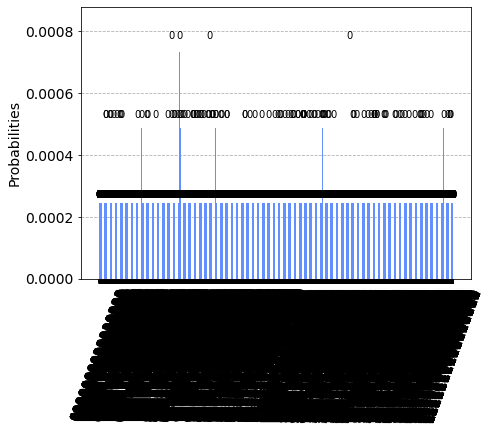

In [7]:
i=0

#print(type(np.meshgrid(gammas, betas)[0]))


#print(np.meshgrid(gammas, betas)[0].flatten().tolist())

#for (g, b) in zip(gammas, betas):
#    print(g)
#    print(b)
#    i=i+1
#    print(i)
          
#print(np.meshgrid(gammas, betas)[1])

# run on local simulator
backend = Aer.get_backend("qasm_simulator")
shots = 1024

#TQAOA = transpile(QAOA, backend)
#qobj = assemble(TQAOA, shots=shots)
#QAOA_results = backend.run(qobj).result()

#plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)
tl, bl = np.meshgrid(gammas, betas)
tl = tl.flatten().tolist()
bl = bl.flatten().tolist()
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: b,theta: t} for (t,b) in zip(tl,bl)])
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: 0.0,theta: t} for t in gammas])

print(circuit)

circuits = [ qc.bind_parameters({theta: t, beta: b}) for (t,b) in zip(tl, bl) ]
job = execute(circuits, backend=backend, shots=4*1024)

result = job.result()
counts = result.get_counts()
print(len(counts))
#print(counts)

plot_histogram(counts[0])

In [8]:
# Evaluate the data from the simulator


#hist        = {}
means = []



for count in counts:
    avr_C       = 0
    max_C       = [0,0]
    tmp_eng = 0.0
    
    for sample in list(count.keys()):
        #print(sample)
        # use sampled bit string x to compute C(x)
        x         = [2*int(num)-1 for num in list(sample)]
        #print(x)
        #print(count[sample]/shots)
        tmp_eng   = cost_function_C(x,E,V)

        # compute the expectation value and energy distribution
        avr_C     = avr_C    + count[sample]*tmp_eng
        #hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
        #print(hist)
        #plot_histogram(hist)

        # save best bit string
        if( max_C[1] < tmp_eng):
            max_C[0] = sample
            max_C[1] = tmp_eng

    M1_sampled   = avr_C/shots
    means = means + [M1_sampled]
    #print(M1_sampled)
    
print('Max means: ', max(means))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))

# maximum 5896

Max means:  604.5078125
The approximate solution is x* = 1100000100011000 with C(x*) = 5822 



In [16]:
#2  -1 -1  -1 -1       -1 +1 -1 -1          -1 -1 -1  -1               -1  -1  +1  +1 -5896.0       3 ...
cost_function_C([-1,-1,-1,-1   ,-1,1,-1,-1,   -1,-1,-1,-1,    -1,-1,1,1], E, V)

4080.0

In [17]:
print('Circuit depth: ', qc.depth())

Circuit depth:  33


In [ ]:
iter = 512: 5722 / 5896
iter = 1024: 5636 / 5896
iter = 8*1024: 5830 / 5896
iter = 16*1024: 5876 / 5896
iter = 24*1024: 5846 / 5896